# Detecting Flu Epidemics via Search Engine Query Data

Flu epidemics constitute a major public health concern causing respiratory illnesses, hospitalizations, and deaths. According to the National Vital Statistics Reports published in October 2012, influenza ranked as the eighth leading cause of death in 2011 in the United States. Each year, 250,000 to 500,000 deaths are attributed to influenza related diseases throughout the world.

The U.S. Centers for Disease Control and Prevention (CDC) and the European Influenza Surveillance Scheme (EISS) detect influenza activity through virologic and clinical data, including Influenza-like Illness (ILI) physician visits. Reporting national and regional data, however, are published with a 1-2 week lag.

The Google Flu Trends project was initiated to see if faster reporting can be made possible by considering flu-related online search queries -- data that is available almost immediately.

We would like to estimate influenza-like illness (ILI) activity using Google web search logs. Fortunately, one can easily access this data online:

- ILI Data - The CDC publishes on its website the official regional and state-level percentage of patient visits to healthcare providers for ILI purposes on a weekly basis.

- Google Search Queries - Google Trends allows public retrieval of weekly counts for every query searched by users around the world. For each location, the counts are normalized by dividing the count for each query in a particular week by the total number of online search queries submitted in that location during the week. Then, the values are adjusted to be between 0 and 1.

The csv file FluTrain.csv aggregates this data from January 1, 2004 until December 31, 2011 as follows:

- "Week" - The range of dates represented by this observation, in year/month/day format.

- "ILI" - This column lists the percentage of ILI-related physician visits for the corresponding week.

- "Queries" - This column lists the fraction of queries that are ILI-related for the corresponding week, adjusted to be between 0 and 1 (higher values correspond to more ILI-related search queries).

### 1.1 - Understanding the Data

Before applying analytics tools on the training set, we first need to understand the data at hand. Load "FluTrain.csv" into a data frame called FluTrain. Looking at the time period 2004-2011, which week corresponds to the highest percentage of ILI-related physician visits? Select the day of the month corresponding to the start of this week.

In [1]:
FluTrain = read.csv('./dataset/FluTrain.csv')
str(FluTrain)

'data.frame':	417 obs. of  3 variables:
 $ Week   : Factor w/ 417 levels "2004-01-04 - 2004-01-10",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ ILI    : num  2.42 1.81 1.71 1.54 1.44 ...
 $ Queries: num  0.238 0.22 0.226 0.238 0.224 ...


In [2]:
summary(FluTrain)

                      Week          ILI            Queries       
 2004-01-04 - 2004-01-10:  1   Min.   :0.5341   Min.   :0.04117  
 2004-01-11 - 2004-01-17:  1   1st Qu.:0.9025   1st Qu.:0.15671  
 2004-01-18 - 2004-01-24:  1   Median :1.2526   Median :0.28154  
 2004-01-25 - 2004-01-31:  1   Mean   :1.6769   Mean   :0.28603  
 2004-02-01 - 2004-02-07:  1   3rd Qu.:2.0587   3rd Qu.:0.37849  
 2004-02-08 - 2004-02-14:  1   Max.   :7.6189   Max.   :1.00000  
 (Other)                :411                                     

In [4]:
FluTrain$Week[which.max(FluTrain$ILI)]

[1] 2009-10-18 - 2009-10-24
417 Levels: 2004-01-04 - 2004-01-10 ... 2011-12-25 - 2011-12-31

In [5]:
FluTrain$Week[which.max(FluTrain$Queries)]

[1] 2009-10-18 - 2009-10-24
417 Levels: 2004-01-04 - 2004-01-10 ... 2011-12-25 - 2011-12-31

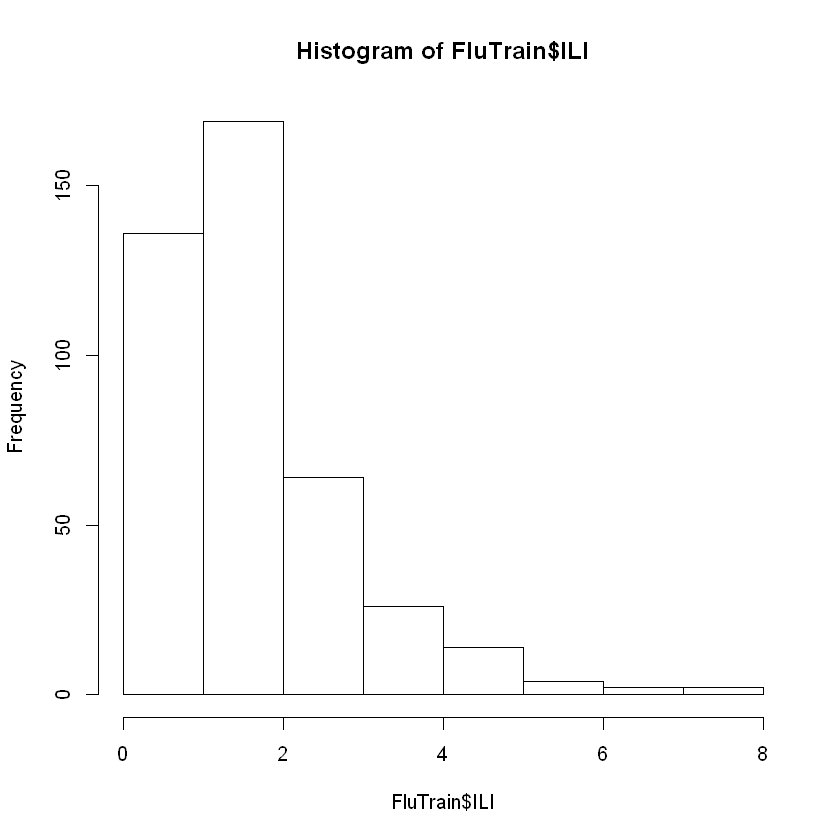

In [6]:
hist(FluTrain$ILI)

### 1.3 - Understanding the Data

When handling a skewed dependent variable, it is often useful to predict the logarithm of the dependent variable instead of the dependent variable itself -- this prevents the small number of unusually large or small observations from having an undue influence on the sum of squared errors of predictive models. In this problem, we will predict the natural log of the ILI variable, which can be computed in R using the log() function.

Plot the natural logarithm of ILI versus Queries. What does the plot suggest?.

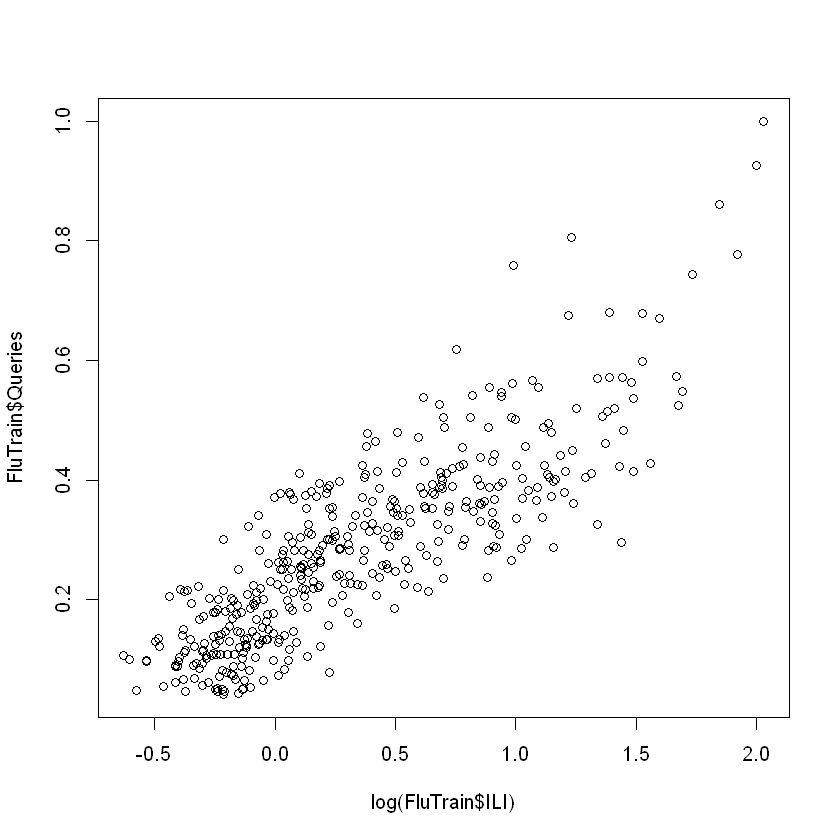

In [7]:
plot(log(FluTrain$ILI), FluTrain$Queries)

### 2.1 - Linear Regression Model

Based on the plot we just made, it seems that a linear regression model could be a good modeling choice. Based on our understanding of the data from the previous subproblem, which model best describes our estimation problem?

In [11]:
FluTrend1 = lm(log(ILI) ~ Queries, data=FluTrain)
summary(testReg)


Call:
lm(formula = log(ILI) ~ Queries, data = FluTrain)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.76003 -0.19696 -0.01657  0.18685  1.06450 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.49934    0.03041  -16.42   <2e-16 ***
Queries      2.96129    0.09312   31.80   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2995 on 415 degrees of freedom
Multiple R-squared:  0.709,	Adjusted R-squared:  0.7083 
F-statistic:  1011 on 1 and 415 DF,  p-value: < 2.2e-16


### 2.3 - Linear Regression Model

For a single variable linear regression model, there is a direct relationship between the R-squared and the correlation between the independent and the dependent variables. What is the relationship we infer from our problem? (Don't forget that you can use the cor function to compute the correlation between two variables.)

In [14]:
corr = cor(log(FluTrain$ILI), FluTrain$Queries)
corr

[1] 0.8420333

In [15]:
corr^2

[1] 0.7090201